# Introduction

Previoulsy in the Applied Data Science Capstone project we compared neighbourhoods within both New York and Toronto. In this project we are going to compare neighbourhoods between 2 different cities - New York, USA and London, UK

In New York there are 306 different neighbourhoods across 5 different boroughs. There are similarities between the neighbourhoods within each of these boroughs.

In particular, I want to be able to compare area from another city to decide which borough that area is most similar to. For example, is Toronto's Scarbourgh Village neighbourhood most similar to neighbourhoods found in the Bronx, Brooklyn, Manhatten, Queens or Staten Island boroughs in New York.

As I am from UK, I will be comparing area in London, UK to New York, USA.

<em> Scenario </em>

Imagine I am a Data Scientist who currently works for Google in New York, work at the Google offices in New York which are based Chelsea, Manhatten and live in the borough of Manhatten.

I have recently been asked to relocate for work to Google's offices near Kings Cross in London, UK. However I currently know nothing about London or what it is like as a place to live. Before deciding where I would like to move to, I would like to first narrow down my options. 

Even though I don't know anything about London I know that I enjoy living in the Manhatten area of New York and would therefore like to know what areas of London are most similar to Manhatten by using available Foursquare API data. In addition, I'd also not like to be too far from my office near Kings Cross.

We first look at all areas of London to establish which New York boroughs they are most similar to. Then from the areas which are most similar to Manhatten, we will then establish how far from the new Google offices near King Cross they are to establish a shortlist of 3 areas I should consider living in when I moved to London.

<em> Notes </em>

This could be a comparison of any two cities where the data is readily available. London and New York are just a demonstation of it being successfully applied.

Moreover, this general idea could be used in a different context, for example a business that has many succesful stores in Manhatten that is looking to expand to London and is unsure of the best area to locate itself.

# Data

### New York Neighbourhood Data

The data for New York's borough and neighbourhood data will come from, used in the previous practicals in the Applied Data Science Capstone

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

This dataset contains every Neighboorhood in New York, the borough they are in as well as their longitude and latitude.

The dataframe has 5 boroughs and 306 unique neighborhoods.

In [1]:
import pandas as pd

df = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_of_New_York_City')

#Select correct dataframe (0th) from list of dataframes
df = df[0]

#Drop multiindex names from columns
df.columns = df.columns.droplevel().droplevel()

#Remove bottom 2 rows as summary and comments
df = df[:-3]

#Rename columns as population estimte
df.rename(columns={'Estimate (2019)[3]':'Population Estimate (2019)'}, inplace=True)

print('Total population of New York : '+ str(df['Population Estimate (2019)'].astype(int).sum()))
print('Average population of New York Borough: '+ str(df['Population Estimate (2019)'].astype(int).mean()))
#Divide total population by number of neighbourhoods
print('Average population of New York Neighbourhood : '+ str(df['Population Estimate (2019)'].astype(int).sum()/306))

#Show the relevent columns
df[['Borough', 'Population Estimate (2019)']]

Total population of New York : 8336817
Average population of New York Borough: 1667363.4
Average population of New York Neighbourhood : 27244.5


,Borough,Population Estimate (2019)
0,The Bronx,1418207
1,Brooklyn,2559903
2,Manhattan,1628706
3,Queens,2253858
4,Staten Island,476143


<strong> The population of each of these boroughs is approximately 1,700,000 people per borough 

The population of each of these boroughs is approximately 27,000 people per neighbourhood </strong>

### London Borough Data

The data for Londons boroughs and data will come from data scraped from wikipedia (like we did with Toronto)

https://en.wikipedia.org/wiki/List_of_London_boroughs

This dataset contains every Borough in London as well as the longitude and latitude coordinate (which has to be wrangled into the correct form). There are other features which are not required

The dataframe has 32 boroughs (and we do not include the City of London, as it is not a borough)

Data scraped from https://en.wikipedia.org/wiki/List_of_London_boroughs

In [2]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')

#Select correct dataframe (0th) from list of dataframes
df2 = df2[0]

#Rename columns as population estimte
df2.rename(columns={'Population (2013 est)[1]':'Population Estimate (2013)'}, inplace=True)

print('Total population of London : '+str(df2['Population Estimate (2013)'].sum()))
print('Average population of London Borough: '+str(df2['Population Estimate (2013)'].mean()))

#Show the relevent columns
df2[['Borough', 'Population Estimate (2013)']]

Total population of London : 8408887
Average population of London Borough: 262777.71875


,Borough,Population Estimate (2013)
0,Barking and Dagenham [note 1],194352
1,Barnet,369088
2,Bexley,236687
3,Brent,317264
4,Bromley,317899
5,Camden,229719
6,Croydon,372752
7,Ealing,342494
8,Enfield,320524
9,Greenwich [note 2],264008


<strong>The population of each of these boroughs is approximately 260,000 people per borough</strong>

### New York 'Boroughs' and London 'Boroughs' are not the same - would be like comparing apples and oranges

We can see by comparing average population sizes of New York 'boroughs' and London 'boroughs' that they are not the same size as one another. In particular, a New York borough has approximately 6 to 7 times the population of a London Borough (~1,700,000 and ~260,000 respectively). As such, the boroughs are not comparable. A New York borough is larger than than a London borough.

However, we can also that we can see by comparing average population sizes of a New York neighbourhoods and London boroughs they are not the same size as one another. In particular, a London borough has approximately 10 times the population of a New York Borough (~260,000 and ~27,000 respectively). A London Borough is larger than than a New York Borough.

In particular, it worth noting that a London Borough is somewhere in between the size of a New York neighbourhood and borough. Consequently, It will be crucial to normalise features to allow for fair comparison.

### Similarity data - Foursquare API

We will be utilizing the Foursquare API to establish the features of the neighborhoods in New York. We will collect the types of venues within each neighbourhood. We also use the Foursquare API to establish the features of Boroughs in London. We will collect the types of venues within each borough.

To encode a venue list from the Foursquare API into features we will use one-hot encoding over the venues type in both London Boroughs and New York neighbourhoods, this will ensure features between the two data sets are the same (crucial for comparison later). 

After one-hot encoding, we then want to group by New York Neighbourhood and London Boroughs by taking the mean of the frequency of occurrence of each category, to normalise features. We can call this data our feature space (X)

At this point we should clearly label our New York Neighbourhood data for train and cross-validation data and London Borough data as test data (X_test).

To the New York Neighbourhood feautre data from Foursquare (X) we can add New York Borough labels which have been given an numerical encoding (y), as well splitting it into train (X_train, y_train) and cross-validation datasets (X_cv, y_cv)
(stratified by Borough, 70% - train and 30% Cross Validation).

I then to use the K-Nearest Neighbour Classification model on the New York Neighbourhood data with Borough label to train a Borough classification model.
(i.e. given a Neighbourhoods features it should be able to classify what Borough it belongs to)

We will use the 30% cross-validation set from New York data to establish the best value for K (the number of nearest neighbours), by finding the best accuracy for a range of possible K values.

I will then use the test data for London Boroughs to classify them according to what New York Boroughs they are most similar to.

Then it simple to restrict data to London Boroughs most similar to Manhatten.

### Distance from new Office

The current Google office in London can be found on Google Maps
https://www.google.com/maps/place/Google+UK/@51.5332609,-0.1281919,17z/data=!3m1!4b1!4m5!3m4!1s0x48761b3c54efa6e1:0xc7053ab04745950d!8m2!3d51.5332609!4d-0.1260032

Right clicking on the pop-up and clicking What's here reveal the longitude and latitude for the building
Latitude = 51.5332609
Longitude = -0.1260032

Using the Longatude and Latitude in the London data set allows us to calculate the birdseye distance from the Borough to the office. We will then be able to sort our list of London Boroughs like Manhatten by this distance to give a shortlist of 3 London Boroughs which are most like Manhatten and are close to the Google office in London.

# Methodology and Results

### Import necessary Libraries

In [105]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

import json # library to handle JSON files

#!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as ticker

# import k-means from clustering stage
from sklearn.neighbors import KNeighborsClassifier

# import metrics from sklearn
from sklearn import metrics

#!pip install folium # uncomment this line if you already have installed
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### New York Neighbourhood Data

Download New York Neighbourhood data

In [5]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


Next, let's load the data.

In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Construct data frame for neighbourhood data

In [7]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

#Then let's loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                                'Neighborhood': neighborhood_name,
                                                'Latitude': neighborhood_lat,
                                                'Longitude': neighborhood_lon}, ignore_index=True)

Lets examine the data

In [8]:
ny_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


It worth noting that there are 4 neighbourhoods with the same name but different boroughs, as 306 Neighbourhoods above but only 302 unique neighbourhood names.

In [19]:
len(ny_neighborhoods.Neighborhood.unique())

302

### London Borough Data

Scrape London Borough Data from Wikipedia

In [10]:
boroughs = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')

#Select correct dataframe (0th) from list of dataframes
london_boroughs = boroughs[0]

#Select only necessary columns
london_boroughs = london_boroughs[['Borough', 'Co-ordinates']].copy()

london_boroughs.head()

,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


Tidy up the 'Borough' column to remove any notes

In [11]:
#Tidy up names of 'Borough' column. Remove any square parenthesis preceeded by a space
london_boroughs['Borough'] = [boroughs.split(" [")[0] for boroughs in london_boroughs['Borough']]

london_boroughs.head()

,Borough,Co-ordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


Take the decimal co-ordinates rather the degrees and arc seconds version

In [12]:
#Take decimal co-ordinates for each borough rather than degrees and arc seconds
london_boroughs['Co-ordinates'] = [coords.split("/")[-1] for coords in london_boroughs['Co-ordinates']]

london_boroughs.head()

,Borough,Co-ordinates
0,Barking and Dagenham,﻿51.5607°N 0.1557°E
1,Barnet,﻿51.6252°N 0.1517°W
2,Bexley,﻿51.4549°N 0.1505°E
3,Brent,﻿51.5588°N 0.2817°W
4,Bromley,﻿51.4039°N 0.0198°E


Create Latitude and Longitude and Latitude from coordinates

In [13]:
#Latitude from Co-ordinates. All coordinate are °N with is positive.
london_boroughs['Latitude'] = [coords.split("°N")[0] for coords in london_boroughs['Co-ordinates']]

#Remove ' \ufeff' from each Latitude entry
london_boroughs['Latitude'] = [lat.split(' \ufeff')[-1] for lat in london_boroughs['Latitude']]

#Longitude from Co-ordinates. Keep °E or °W as it will signify positive or negative sign
london_boroughs['Longitude'] = [coords.split("°N ")[-1] for coords in london_boroughs['Co-ordinates']]

#Seperate E/W for sign purposes of Longitude
london_boroughs['Longitude sign'] = [long.split("°")[-1] for long in london_boroughs['Longitude']]

#Remove E/W for Longitude and cast to float
london_boroughs['Longitude'] = [long.split("°")[0] for long in london_boroughs['Longitude']]

#We want to map E->1 and W->-1
#First convert to True if 'E' then cast to int. 'E' -> 1, 'W'->0
london_boroughs['Longitude sign'] = (london_boroughs['Longitude sign']=='E').astype(int)
#Then Map 1->1 and 0->-1, using f(x)=2*x - 1
london_boroughs['Longitude sign'] = 2*london_boroughs['Longitude sign']-1

#Cast Latitude and Longitude as a float
london_boroughs['Latitude'] = pd.to_numeric(london_boroughs['Latitude'])
london_boroughs['Longitude'] = pd.to_numeric(london_boroughs['Longitude'])

#Multiply Longitude by Longitude sign
london_boroughs['Longitude'] = london_boroughs['Longitude']*london_boroughs['Longitude sign']

#Drop Co-ordinates
london_boroughs.drop(columns=['Co-ordinates', 'Longitude sign'],inplace=True)

london_boroughs

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


### Define Foresquare Credientials

In [14]:
#@hidden-cell
CLIENT_ID = 'XT2LDFOVZUGDEFYZU4A1PLM5X4UUP0204FYZ4W4H10LCOSII' # your Foursquare ID
CLIENT_SECRET = '0KMOFB3UXX4JDRU5A40EJMO3HMKHOKQHXGDV3G4ESSA0LYO0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

### Define function to collect nearby venues

Let's create a function to collect venue information around an area using the Foursquare API

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):    
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    print('All areas venues collected')
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### New York Neighbourhood Foursquare Similarity Data

It worth noting that there are 4 neighbourhoods with the same name but different boroughs. So add Borough to Neighbourhood to create an area

In [37]:
ny_neighborhoods['Area'] = ny_neighborhoods['Neighborhood'] + ', ' + ny_neighborhoods['Borough']

Use the same radius of 500m as used in the earlier demonstrations

In [38]:
ny_radius = 500
ny_venues = getNearbyVenues(ny_neighborhoods['Area'], ny_neighborhoods['Latitude'], ny_neighborhoods ['Longitude'], ny_radius)

Wakefield, Bronx
Co-op City, Bronx
Eastchester, Bronx
Fieldston, Bronx
Riverdale, Bronx
Kingsbridge, Bronx
Marble Hill, Manhattan
Woodlawn, Bronx
Norwood, Bronx
Williamsbridge, Bronx
Baychester, Bronx
Pelham Parkway, Bronx
City Island, Bronx
Bedford Park, Bronx
University Heights, Bronx
Morris Heights, Bronx
Fordham, Bronx
East Tremont, Bronx
West Farms, Bronx
High  Bridge, Bronx
Melrose, Bronx
Mott Haven, Bronx
Port Morris, Bronx
Longwood, Bronx
Hunts Point, Bronx
Morrisania, Bronx
Soundview, Bronx
Clason Point, Bronx
Throgs Neck, Bronx
Country Club, Bronx
Parkchester, Bronx
Westchester Square, Bronx
Van Nest, Bronx
Morris Park, Bronx
Belmont, Bronx
Spuyten Duyvil, Bronx
North Riverdale, Bronx
Pelham Bay, Bronx
Schuylerville, Bronx
Edgewater Park, Bronx
Castle Hill, Bronx
Olinville, Bronx
Pelham Gardens, Bronx
Concourse, Bronx
Unionport, Bronx
Edenwald, Bronx
Bay Ridge, Brooklyn
Bensonhurst, Brooklyn
Sunset Park, Brooklyn
Greenpoint, Brooklyn
Gravesend, Brooklyn
Brighton Beach, Brookl

Lets view a snippet of the extracted data

In [39]:
ny_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Wakefield, Bronx",40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,"Wakefield, Bronx",40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,"Wakefield, Bronx",40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,"Wakefield, Bronx",40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,"Wakefield, Bronx",40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


And lets see what the dimensions of the collected data are:

In [40]:
ny_venues.shape

(10106, 7)

Get a summary of number by neighbourhood 

In [41]:
ny_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
"Allerton, Bronx",30,30,30,30,30,30
"Annadale, Staten Island",11,11,11,11,11,11
"Arden Heights, Staten Island",5,5,5,5,5,5
"Arlington, Staten Island",6,6,6,6,6,6
"Arrochar, Staten Island",22,22,22,22,22,22
...,...,...,...,...,...,...
"Woodhaven, Queens",25,25,25,25,25,25
"Woodlawn, Bronx",25,25,25,25,25,25
"Woodrow, Staten Island",21,21,21,21,21,21


Let's find out how many unique categories can be curated from all the returned venues

In [42]:
print('New York has {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

New York has 428 uniques categories.


Lets export this data for use potential use later without having to re-run Foursquare API calls - hidden cell

In [43]:
# The code was removed by Watson Studio for sharing.

### London Borough Foursquare Similarity Data

Given that London Borough are approximately 10 times the population, we assume they are 10 times the area of New York neighbourhood. As such the radius will should be sqrt(10) times larger, which is approximately 3.

We use a radius of 1500m as used in the earlier demonstrations

In [44]:
london_radius = 1500
london_venues = getNearbyVenues(london_boroughs['Borough'], london_boroughs['Latitude'], london_boroughs ['Longitude'], london_radius)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
All areas venues collected


View a snippet of extracted data

In [45]:
london_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,51.5607,0.1557,Asda,51.565770,0.143393,Supermarket
3,Barking and Dagenham,51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store
4,Barking and Dagenham,51.5607,0.1557,B&M Store,51.565287,0.143793,Discount Store


What are the dimension of the data

In [46]:
london_venues.shape

(2468, 7)

Venue summary of venue count by London Borough

In [47]:
london_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Barking and Dagenham,22,22,22,22,22,22
Barnet,21,21,21,21,21,21
Bexley,61,61,61,61,61,61
Brent,100,100,100,100,100,100
Bromley,59,59,59,59,59,59
Camden,100,100,100,100,100,100
Croydon,95,95,95,95,95,95
Ealing,100,100,100,100,100,100
Enfield,75,75,75,75,75,75


Let's find out how many unique categories can be curated from all the returned venues

In [48]:
print('London has {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

London has 263 uniques categories.


Lets export this data for use potential use later without having to re-run Foursquare API calls - hidden cell

In [49]:
# The code was removed by Watson Studio for sharing.

### Concatenate data frames to ensure the columns are the same

In [50]:
#Add NY Label to dataframe
ny_venues['City'] = 'New York'

#Add London Label to dataframe
london_venues['City'] = 'London'

#Concatenate the London and NY Dataset to ensure features are the same
city_venues = pd.concat([ny_venues, london_venues], axis=0, ignore_index=True)

city_venues.shape

(12574, 8)

### Normalise features

One hot encode venue type to generate features

In [52]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add areas and city column back to dataframe
city_onehot['Area'] = city_venues['Area'] 
city_onehot['City'] = city_venues['City'] 

# move areas and city column to the first and second column
fixed_columns = [city_onehot.columns[-2]] + [city_onehot.columns[-1]] + list(city_onehot.columns[:-2])
city_onehot = city_onehot[fixed_columns]

city_onehot.shape

(12574, 470)

Split features back by city 

In [53]:
london_onehot = city_onehot[city_onehot['City'] == 'London'].copy()
ny_onehot = city_onehot[city_onehot['City'] == 'New York'].copy()

Drop the City column from the one-hot columns

In [57]:
london_onehot.drop(columns=['City'], inplace=True)
ny_onehot.drop(columns=['City'], inplace=True)

### Normalise features

Calculate what the proportion of each type of store is in each area

In [58]:
london_grouped = london_onehot.groupby('Area').mean().reset_index()
london_grouped

,Area,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Barnet,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Bexley,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.032787,0.0,0.0,...,0.0,0.016393,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Brent,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.020000,0.0,0.0,...,0.0,0.020000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Bromley,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.016949,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,Camden,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,0.000000,0.0,0.000000,0.000000
6,Croydon,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,Ealing,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020000,0.000000,0.0,0.000000,0.000000
8,Enfield,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.013333,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.013333,0.000000
9,Greenwich,0.0,0.0,0.00,0.013889,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.013889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [75]:
ny_grouped = ny_onehot.groupby('Area').mean().reset_index()
ny_grouped

,Area,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Allerton, Bronx",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
1,"Annadale, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
2,"Arden Heights, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
3,"Arlington, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
4,"Arrochar, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Woodhaven, Queens",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
302,"Woodlawn, Bronx",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
303,"Woodrow, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0
304,"Woodside, Queens",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.013333,0.0,0.0,0.0


### Name NY Feature Data set at X and Borough

Rename areas back to Neighbourhood name and Borough name

In [76]:
#Remove ", " to translate NY Areas back into Neighborhood name and Borough, note there is a column called Neighborhood already
ny_grouped['Neighborhood Name'] = [area.split(", ")[0] for area in ny_grouped['Area']]
ny_grouped['Borough Name'] = [area.split(", ")[-1] for area in ny_grouped['Area']]
ny_grouped.drop(columns=['Area'],inplace=True)

# move Neighbourhood and Borough column to the first and second column
fixed_columns = [ny_grouped.columns[-2]] + [ny_grouped.columns[-1]] + list(ny_grouped.columns[:-2])
ny_grouped = ny_grouped[fixed_columns]

Lets see the data

In [77]:
ny_grouped.head()

,Neighborhood Name,Borough Name,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,Bronx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split the New York data into X and y data

In [81]:
X = ny_grouped.drop(columns=['Borough Name', 'Neighborhood Name'])
# Encode y as a category
y = ny_grouped['Borough Name'].astype('category')

y is encoded using the categoy type

In [82]:
y = y.astype('category')

y.cat.code reveals an encoded y

In [83]:
y.cat.codes

0      0
1      4
2      4
3      4
4      4
      ..
301    3
302    0
303    4
304    3
305    2
Length: 306, dtype: int8

y.cat.categories reveal the encoding.

In [225]:
y.cat.categories

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

* Bronx = 0
* Brooklyn = 1
* Manhatten = 2
* Queens = 3
* Staten Island = 4

### Split the NY data into train, cross_validation set

Split our New York data into train (70%) and cross validation (30%) sets 

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=3)

### Name London features as X_test

Drop area name from dataset to leave just the features

In [155]:
X_test = london_grouped.drop(columns=['Area'])

### Run the KNN model for various k values

In [156]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_cv)
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat)   
    std_acc[n-1]=np.std(yhat==y_cv)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32608696, 0.29347826, 0.35869565, 0.35869565, 0.34782609,
       0.31521739, 0.40217391, 0.40217391, 0.39130435])

### Select best K value using the cross validation data set

Plot  model accuracy  for Different number of Neighbors

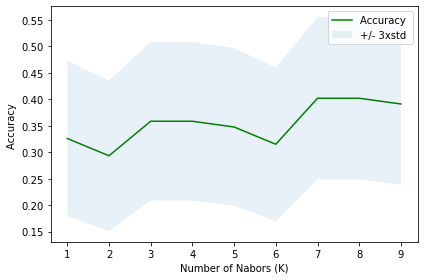

In [157]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [158]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.40217391304347827 with k= 7


### Use the model with k=7 to predict London Boroughs

Given that a k=7 gave the most accurate predictions of New York Boroughs, use this to indicate what New York Borough each London Borough is most similar to.

In [159]:
k=7   
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat=neigh.predict(X_test)
yhat

array(['Manhattan', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan',
       'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
       'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
       'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
       'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
       'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
       'Manhattan', 'Manhattan'], dtype=object)

In [162]:
london_boroughs['NY Similar Borough'] = yhat

In [163]:
london_boroughs

,Borough,Latitude,Longitude,NY Similar Borough
0,Barking and Dagenham,51.5607,0.1557,Manhattan
1,Barnet,51.6252,-0.1517,Brooklyn
2,Bexley,51.4549,0.1505,Manhattan
3,Brent,51.5588,-0.2817,Manhattan
4,Bromley,51.4039,0.0198,Manhattan
5,Camden,51.5290,-0.1255,Manhattan
6,Croydon,51.3714,-0.0977,Manhattan
7,Ealing,51.5130,-0.3089,Manhattan
8,Enfield,51.6538,-0.0799,Manhattan
9,Greenwich,51.4892,0.0648,Manhattan


According to this mode KNN model, most London boroughs are most similar to Manhattan (other than Barnet and Hillingdon - which are most similar to Brooklyn)

### Filter to Boroughs which are like Manhattan

In [165]:
london_boroughs_sim_manhattan = london_boroughs.loc[london_boroughs['NY Similar Borough']=='Manhattan'].copy()

In [167]:
london_boroughs_sim_manhattan.reset_index(inplace=True, drop=True)

In [168]:
london_boroughs_sim_manhattan

,Borough,Latitude,Longitude,NY Similar Borough
0,Barking and Dagenham,51.5607,0.1557,Manhattan
1,Bexley,51.4549,0.1505,Manhattan
2,Brent,51.5588,-0.2817,Manhattan
3,Bromley,51.4039,0.0198,Manhattan
4,Camden,51.5290,-0.1255,Manhattan
5,Croydon,51.3714,-0.0977,Manhattan
6,Ealing,51.5130,-0.3089,Manhattan
7,Enfield,51.6538,-0.0799,Manhattan
8,Greenwich,51.4892,0.0648,Manhattan
9,Hackney,51.5450,-0.0553,Manhattan


Unfortunately, this hasn't narrowed things down too much

### Calculate distance to London office

Calculate the distance for each borough to the office

The current Google office in London can be found on Google Maps https://www.google.com/maps/place/Google+UK/@51.5332609,-0.1281919,17z/data=!3m1!4b1!4m5!3m4!1s0x48761b3c54efa6e1:0xc7053ab04745950d!8m2!3d51.5332609!4d-0.1260032

Right clicking on the pop-up and clicking What's here reveal the longitude and latitude for the building Latitude = 51.5332609 Longitude = -0.1260032

Using the Longatude and Latitude in the London data set allows us to calculate the birdseye distance from the Borough to the office. We will then be able to sort our list of London Boroughs like Manhatten by this distance to give a shortlist of 3 London Boroughs which are most like Manhatten and are close to the Google office in London.

In [173]:
office_lat = 51.5332609
office_long = -0.1260032

In [193]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

#office_latitude = 51.5332609, office_longitude = -0.1260032
office_lat = radians(51.5332609)
office_long = radians(-0.1260032)

#Column vector of latitude and longitude in radians
lat_v = london_boroughs_sim_manhattan['Latitude'].apply(lambda x: radians(x))
long_v = london_boroughs_sim_manhattan['Longitude'].apply(lambda x: radians(x))

#Find the different in latitude and longitude 
diff_lat_v = lat_v - office_lat
diff_long_v = long_v - office_long

sin_diff_lat_v = diff_lat_v.apply(lambda x: sin(x / 2)**2)
cos_office_lat = cos(office_lat)
cos_lat_v = lat_v.apply(lambda x: cos(x))
sin_diff_long_v = diff_long_v.apply(lambda x: sin(x / 2)**2)

a_v = sin_diff_lat_v + cos_office_lat*cos_lat_v*sin_diff_long_v
c_v = a_v.apply(lambda x: 2*atan2(sqrt(x), sqrt(1 - x)))

distance_v = R * c_v

In [194]:
distance_v

0     19.723196
1     21.038578
2     11.138234
3     17.581281
4      0.475216
5     18.110333
6     12.856799
7     13.780824
8     14.088285
9      5.062721
10     8.725742
11     7.487148
12    15.735518
13    22.071370
14    17.980583
15     1.890084
16     5.890619
17    18.676206
18     8.098857
19    12.203692
20    15.443677
21    12.299920
22    14.134535
23    16.792886
24     4.573937
25    19.653783
26     8.708942
27    10.079032
28     9.632183
29     4.074319
dtype: float64

Add distance to office as a column to London Borough data

In [195]:
london_boroughs_sim_manhattan['Distance to office (km)'] = distance_v

### Choose top 3 potential best candidate Boroughs

In [197]:
london_boroughs_sim_manhattan.sort_values('Distance to office (km)').head(3)

,Borough,Latitude,Longitude,NY Similar Borough,Distance to office (km)
4,Camden,51.5290,-0.1255,Manhattan,0.475216
15,Islington,51.5416,-0.1022,Manhattan,1.890084
29,Westminster,51.4973,-0.1372,Manhattan,4.074319


The 3 boroughs closest to the new office which are most similar to Manhattan are ***Camden, Islington and Westminster***

# Discussion

I found that using the KNN Classifier identified all except 2 of the London Boroughs as most similar to Manhattan. This did little reduce the number of Boroughs to consider, so in this particular problem it did little to help reduce the number of Boroughs to consider living in. There are some possible causes for this in the methodology used which could be changed in future. It could be due to the dimensions of the feature set used to train the model. The New York data had 468 features and 306 examples, this increases the likelihood of overfitting. It may be sensible to try to reduce the number of features using a technique such as Principle Component Analysis (PCA). 

There were also a few other limitations of the methodology used to collect feature set data. It is worth noting that when collecting venues from the Foursquare API is limited to a maximum limit of 100 venue for each New York Neighbourhood and London Boroughs, there were several which met this limit of 100. This limit is due the limit of 50,500 daily API calls in Foursquares free developer account. This limit could be increased to ensure that all venues in each Neighbourhood/Borough is found to ensure the features have accounts for all venues. 

It’s also worth noting that venues from the Foursquare API are fetched based on the distance from the centre of New York neighbourhood/London borough. This is potentially flawed in 2 major ways, the radius used could fail to include all venues in a neighbourhood/borough and there is the potential for overlap between the radii of neighbourhoods/boroughs which could mean that a venue could appear in multiple neighbourhoods/boroughs. Perhaps a more robust approach could be to generate a large list of venues, and use zipcode/postcode data to classify which neighbourhoods/boroughs they belonged to avoid both missing venues and duplicate venues in multiple areas.

# Conclusion

It appears that most London Boroughs (apart from Barnet and Hillingdon) are similar to Manhattan, so in terms of locations to consider relocating to London most are similar to London and should be suitable for our Data Scientist who wants to live somewhere like Manhattan. As such the primary factor in considering where to relocate to is going to be the distance from the office location. Consequently, the best 3 Boroughs to consider living in are Camden, Islington, and Westminster. This should help our Data Scientist to reduce the number of Boroughs to consider when moving to London.